In [1]:
import pandas as pd
df = pd.read_csv("E:/excel/customer_support_tickets.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [2]:
print(df.isna().sum())
print(f"Status: {df['Ticket Status'].unique()}")
print(f"Type: {df['Ticket Type'].unique()}")
print(f"Priority: {df['Ticket Priority'].unique()}")
print(f"Channel: {df['Ticket Channel'].unique()}")

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64
Status: ['Pending Customer Response' 'Closed' 'Open']
Type: ['Technical issue' 'Billing inquiry' 'Cancellation request'
 'Product inquiry' 'Refund request']
Priority: ['Critical' 'Low' 'High' 'Medium']
Channel: ['Social media' 'Chat' 'Email' 'Phone']


In [3]:
df['Ticket Description'] = df['Ticket Description'].str.replace(r'\{.*?\}', '', regex=True).str.strip()

In [4]:
df['Ticket Subject'] = df['Ticket Subject'].str.lower().str.strip()
df['Ticket Subject']

0                  product setup
1       peripheral compatibility
2                network problem
3                 account access
4                      data loss
                  ...           
8464        installation support
8465              refund request
8466              account access
8467               payment issue
8468              hardware issue
Name: Ticket Subject, Length: 8469, dtype: object

In [5]:
df['Resolution'] = df.apply(lambda x: 'Not Yet Resolved' if pd.isna(x['Resolution']) and x['Ticket Status'] in ['Open', 'Pending Customer Response'] else x['Resolution'], axis = 1)

In [6]:
df['Customer Satisfaction Rating'] = df.apply(lambda x: 'Not Rated' if pd.isna(['Customer Satisfaction Rating']) and x['Ticket Status'] != 'Closed' else x['Customer Satisfaction Rating'], axis = 1)

In [7]:
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors = 'coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors = 'coerce')

In [8]:
df['Resolution Duration(Hrs)'] = (df['Time to Resolution']-df['First Response Time']).dt.total_seconds()/3600

In [9]:
df[['Ticket Description', 'Ticket Subject', 'Resolution', 'Customer Satisfaction Rating', 'Resolution Duration(Hrs)']].sample(5)

,Ticket Description,Ticket Subject,Resolution,Customer Satisfaction Rating,Resolution Duration(Hrs)
582,I'm having an issue with the . Please assist. ...,cancellation request,Not Yet Resolved,NaN,NaN
1541,I'm having an issue with the . Please assist. ...,battery life,Not Yet Resolved,NaN,NaN
1488,I'm having an issue with the . Please assist.\...,software bug,Not Yet Resolved,NaN,NaN
773,I'm facing issues logging into my account. It...,product recommendation,Not Yet Resolved,NaN,NaN
5029,I've noticed a software bug in the app. It's ...,peripheral compatibility,Information best cause boy.,4.0,-0.983333


# MOST FREQUENT ISSUES (SUBJECTS)

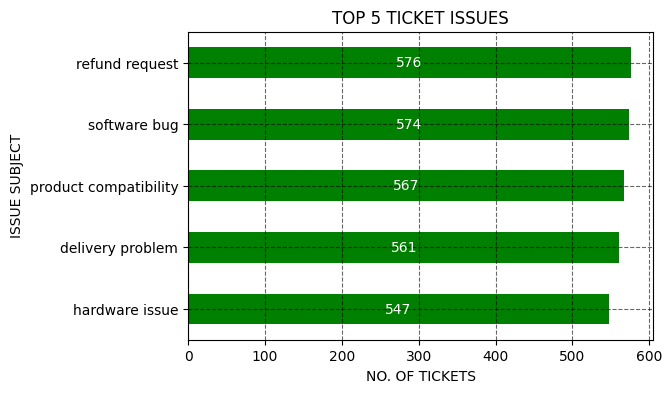

In [10]:
import matplotlib.pyplot as plt
subject = df['Ticket Subject'].value_counts().head(5)
ax = subject.plot(kind = 'barh', color = 'Green', figsize = (6,4))
ax.bar_label(ax.containers[0], label_type = 'center', fontsize = 10, color = 'white')
ax.grid(True, linestyle = '--' , alpha = 0.6, color = 'black' )
plt.title('TOP 5 TICKET ISSUES')
plt.xlabel('NO. OF TICKETS')
plt.ylabel('ISSUE SUBJECT')
plt.gca().invert_yaxis()
plt.savefig("Ticket_Issues", dpi = 300)
plt.show()

# TICKET DISTRIBUTION BY TYPE

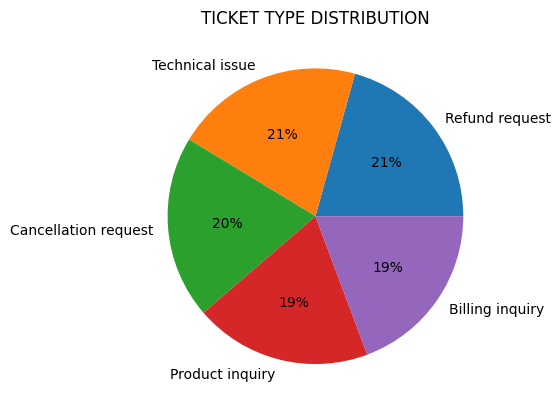

In [11]:
import matplotlib.pyplot as plt
df['Ticket Type'].value_counts().plot(kind = 'pie', autopct = '%1.0f%%')
plt.title('TICKET TYPE DISTRIBUTION')
plt.ylabel("")
plt.savefig("Ticket_Tyoe_Distribution", dpi = 300)
plt.show()

# TICKET DISTRIBUTION BY STATUS

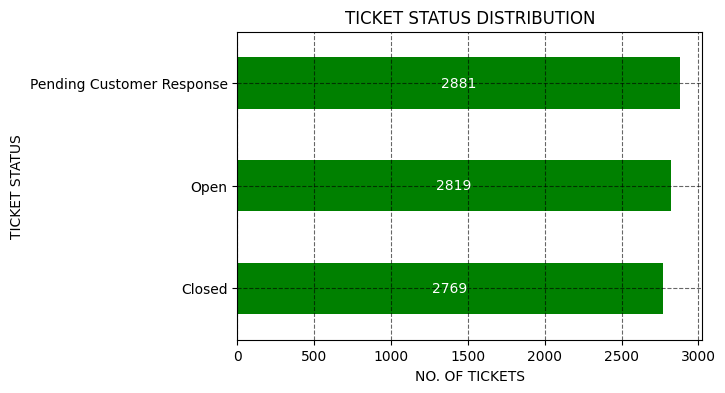

In [12]:
status = df['Ticket Status'].value_counts()
ax = status.plot(kind = 'barh', color = 'Green', figsize = (6,4))
ax.bar_label(ax.containers[0], label_type = 'center', fontsize = 10, color = 'white')
ax.grid(True, linestyle = '--' , alpha = 0.6, color = 'black' )
plt.title('TICKET STATUS DISTRIBUTION')
plt.xlabel('NO. OF TICKETS')
plt.ylabel('TICKET STATUS')
plt.gca().invert_yaxis()
plt.savefig("Ticket_Status_Distribution", dpi = 300)
plt.show()

# AVG RESOLUTION TIME BY TICKET TYPE 

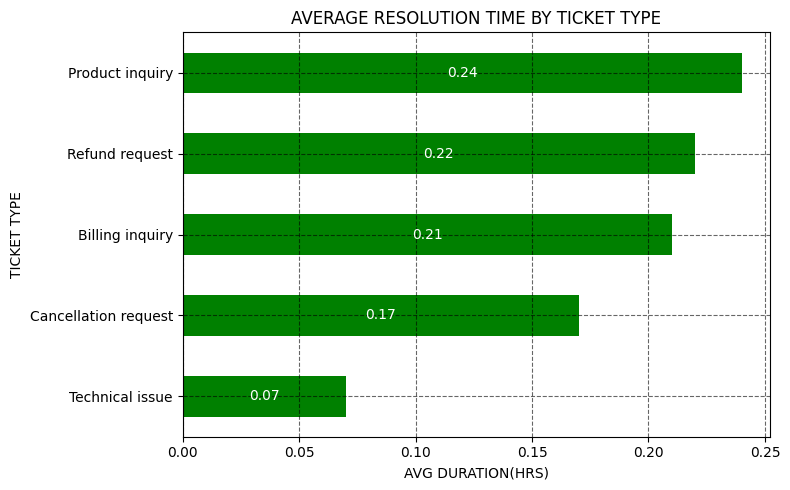

In [13]:
avg_resolution = df.groupby('Ticket Type')['Resolution Duration(Hrs)'].mean().abs().round(2).sort_values()
ax = avg_resolution.plot(kind = 'barh', color = 'Green', figsize = (8,5))
ax.bar_label(ax.containers[0], label_type = 'center', fontsize = 10, color = 'white')
ax.grid(True, linestyle = '--' , alpha = 0.6, color = 'black' )
plt.title('AVERAGE RESOLUTION TIME BY TICKET TYPE')
plt.xlabel('AVG DURATION(HRS)')
plt.ylabel('TICKET TYPE')
plt.tight_layout()
plt.savefig("Avg_Resolution_Time", dpi = 300)
plt.show()

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter

In [15]:
stop_words = set(stopwords.words('english')) 
punct = set(string.punctuation)

def clean_text(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [word for word in tokens if word not in stop_words and word not in punct and word.isalpha()]
    return tokens

df['Cleaned Words'] = df['Ticket Description'].apply(clean_text)

In [16]:
all_words = [word for tokens in df['Cleaned Words'] for word in tokens]
word_freq = Counter(all_words)
word_freq.most_common(10)

[('issue', 11517),
 ('please', 8809),
 ('assist', 6143),
 ('problem', 2285),
 ('product', 2207),
 ('data', 1650),
 ('software', 1530),
 ('account', 1462),
 ('steps', 1390),
 ('persists', 1178)]

# COMMON CUSTOMER SUPPORT ISSUES

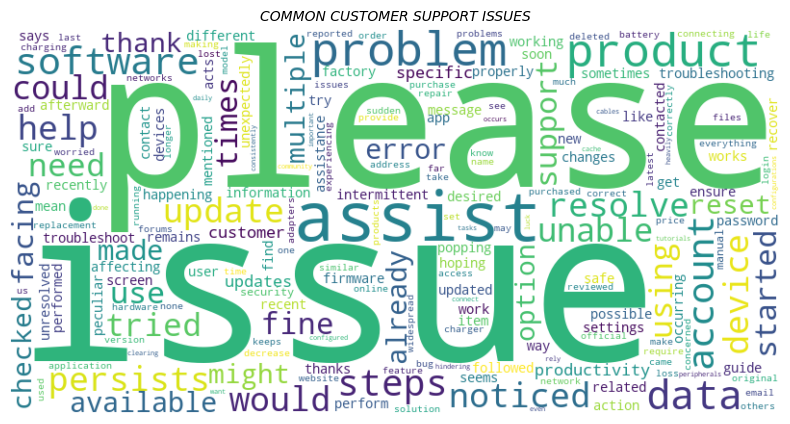

In [17]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate_from_frequencies(word_freq)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('COMMON CUSTOMER SUPPORT ISSUES', size = 10, style = 'oblique')
plt.savefig("Common_Customer_Support_Issues", dpi = 300)
plt.show()

# ---- KEY INSIGHTS ----

### -Most Tickets Are In **Pending Customer Response** Status, Indicating Delay From Customer Side.
### -**Technical Issues** Have The Lowest Average Resolution Time **(0.07 HRS = 4.2 MIN)** Shows Effective Handling.
### -**Product Inquiry** Take The Longest Time To Resolve Which Is **(0.24 HRS = 14.4 MIN)**.
##  -Top Keywords In Customer Tickets: 
###     Text Analysis Revealed That Customers Frequently Use Words Like 'Issue', **'Please', 'Assist', 'Problem', 'Product', 'Account'**. This Indicates That Majority Of Support Requests Are Related To **Product Issue, Technical Problems** And **Account Related Assistance**.

# ---- RECOMMENDATIONS ----

### -Add a chatbot so people can get quick answers to common questions about products or billing, without waiting for an agent.
### -Make the cancellation process easier and faster so customers don’t have to wait too long. 
### -Collect the questions that come up most often and make a clear FAQ page on the website, so people can find answers on their own. -
### -Whenever any major change, maintenance, or known issue is coming up, send an email or app notification in advance. This way, customers know what’s happening and won’t need to contact support as much. 
### -Every month, check which topics are getting the most support tickets, so you can focus on improving those areas.
### -Keep the FAQ updated regularly, so whenever a new question starts coming up often, it’s added quickly and customers always have the latest info.